In [1]:
from itertools import product, combinations
from math import prod

In [42]:
# fname = 'example.txt'
fname = 'input.txt'
        
with open(fname) as f:
    lines = f.readlines()

# [(on, [int(num) for num in rang.replace('x=', '').replace('y=', '').replace('z', '').replace('=', '').split('..') for rang in xyz.split(',')]) for on, xyz in [line.strip().split(' ') for line in lines]]

onoffs, ranges = [], []
for line in lines:
    onoff, xyz = line.strip().split(' ')
    ranges_letters = xyz.split(',')
    range_3d = tuple([tuple(int(val) for val in range_letter.split('=')[1].split('..')) for range_letter in ranges_letters])
    onoffs.append(onoff)
    ranges.append(range_3d)

instructions = list(zip(onoffs, ranges))
# instructions

In [43]:
ranges

[((-33, 18), (-35, 11), (-49, 2)),
 ((-14, 32), (5, 49), (-42, 5)),
 ((-28, 18), (-38, 10), (-14, 33)),
 ((-40, 6), (-22, 32), (-32, 13)),
 ((-14, 37), (-37, 12), (-31, 19)),
 ((-24, 30), (-40, 6), (-19, 27)),
 ((-29, 15), (-44, 7), (-22, 22)),
 ((-49, 2), (-29, 15), (-1, 48)),
 ((-1, 45), (-6, 39), (-16, 37)),
 ((-15, 30), (-35, 14), (4, 49))]

In [4]:
# for _, ranges in instructions:
#     size = [max(rang)-min(rang) for rang in ranges]
#     print(size, prod(size))


In [4]:
points = set()
for onoff, ranges in instructions:
    if any(max(abs(end) for end in ran) > 50 for ran in ranges):
#         print(f"skip {ranges=}")
        continue
    volume = list(product(*[range(low, high+1) for low, high in ranges]))
#     print(volume)
    volume = set(volume)
    
    if onoff == 'on':
        points.update(volume)
    else:
        points.difference_update(volume)
        
print(len(points))

598616


In [29]:
def single_range_intersection(r1, r2):
    # https://scicomp.stackexchange.com/a/26260
    low, high = 0, 1 # assuming in order
    if r2[low] > r1[high] or r1[low] > r2[high]:
        return [] # no intersection
    else:
        return (max(r1[low], r2[low]), min(r1[high], r2[high]))
    

single_range_intersection((0, 2), (2, 4)) # NOTE THIS EDGE CASE

(2, 2)

In [30]:
def range_intersection(range_1, range_2):
#     x1, y1, z1 = range_1
#     x2, y2, z2 = range_2
    
    return [single_range_intersection(*ranges) for ranges in zip(range_1, range_2)]

r1 = [(-82717, -58814), (9792, 34867), (31729, 41188)]
r2 = [(-62226, -36572), (-17931, -2307), (64240, 74646)]

test_range_intersections = range_intersection(r1, r2)
test_range_intersections

[(-62226, -58814), [], []]

In [31]:
size = [max(rang)-min(rang) if rang else 0 for rang in test_range_intersections]
print(size, prod(size))

[3412, 0, 0] 0


In [32]:
def intersection_size(intersection_3d):
    return prod([max(rang)-min(rang) if rang else 0 for rang in intersection_3d])


In [9]:
len(ranges)**3

74088000

In [10]:
# ranges

In [11]:
# intersection_size(range_intersection(ranges[0], ranges[0]))


intersection_size(range_intersection(ranges[0], ranges[0]))


119646

In [26]:
double_intersections = []
# TODO: this doesn't take into account the on/off command
for r1_3d, r2_3d in product(ranges, ranges):
    if r1_3d == r2_3d:
        continue
    if intersection_size(range_intersection(r1_3d, r2_3d)):    
        double_intersections.append(set([r1_3d, r2_3d]))
#         triple_intersections.append(set([r1_3d, r2_3d, r3_3d]))

#         print(r1_3d, r2_3d)
#     print(r1_3d)

# len(double_intersections)
len(set([frozenset(doub) for doub in double_intersections]))

1840

In [22]:
triple_intersections = []
# TODO: this doesn't take into account the on/off command
count_3_intersections = 0
for ii, (r1_3d, r2_3d, r3_3d) in enumerate(product(ranges, ranges, ranges)):
    if not ii % 1000000:
        print(f"{ii}")
#     if not (r1_3d != r2_3d != r3_3d):
    if r1_3d == r2_3d or r2_3d == r3_3d or r3_3d == r1_3d:
        continue
    if intersection_size(range_intersection(r1_3d, r2_3d)) and intersection_size(range_intersection(r2_3d, r3_3d)) and intersection_size(range_intersection(r3_3d, r1_3d)):    
        triple_intersections.append(set([r1_3d, r2_3d, r3_3d]))
#         count_3_intersections += 1
#         print(r1_3d, r2_3d, r3_3d)
#     print(r1_3d)

len(triple_intersections)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
49000000
50000000
51000000
52000000
53000000
54000000
55000000
56000000
57000000
58000000
59000000
60000000
61000000
62000000
63000000
64000000
65000000
66000000
67000000
68000000
69000000
70000000
71000000
72000000
73000000
74000000


19902

In [27]:
triple_intersections[-1]

{((-62226, -36572), (-17931, -2307), (64240, 74646)),
 ((-58709, -30616), (-33464, -11638), (50961, 72748)),
 ((-44911, -23725), (-22548, 198), (55411, 76767))}

In [28]:
len(set([frozenset(trip) for trip in triple_intersections]))

3317

In [44]:
# TODO: this doesn't take into account the on/off command

double_intersections = []

iter_count = 0
for ii, r1_3d in enumerate(ranges):
    for jj, r2_3d in enumerate(ranges):
        if jj >= ii:
            continue
                
        iter_count += 1

        if not iter_count % 1000000:
            print(f"{iter_count}")
        #     if not (r1_3d != r2_3d != r3_3d):

        if r1_3d == r2_3d:
            continue
            
        if intersection_size(range_intersection(r1_3d, r2_3d)):    
#             double_intersections.append(set([r1_3d, r2_3d]))
            double_intersections.append(set([ii, jj]))

len(double_intersections), len(set([frozenset(doub) for doub in double_intersections]))

(44, 44)

In [45]:
# TODO: this doesn't take into account the on/off command

triple_intersections = []

iter_count = 0
for ii, r1_3d in enumerate(ranges):
    for jj, r2_3d in enumerate(ranges):
        if jj >= ii:
            break
        for kk, r3_3d in enumerate(ranges):
            if kk >= jj:
                break
                
            iter_count += 1
            
            if not iter_count % 1000000:
                print(f"{iter_count}")
            #     if not (r1_3d != r2_3d != r3_3d):
            
            if r1_3d == r2_3d or r2_3d == r3_3d or r3_3d == r1_3d:
                continue
            if intersection_size(range_intersection(r1_3d, r2_3d)) and intersection_size(range_intersection(r2_3d, r3_3d)) and intersection_size(range_intersection(r3_3d, r1_3d)):    
#                 triple_intersections.append(set([r1_3d, r2_3d, r3_3d]))
                triple_intersections.append(set([ii, jj, kk]))

len(triple_intersections), len(set([frozenset(trip) for trip in triple_intersections]))

(112, 112)

In [41]:
double_intersections[0:4]

[{0, 1}, {0, 2}, {1, 2}, {0, 3}]

# TODO: test multi-intersect algorithm `intersection_size(range_intersection(r4_3d, range_intersection(r3_3d, range_intersection(r1_3d, r2_3d)))):`

In [93]:
[someset for someset in double_intersections if 0 in someset]

[{0, 1},
 {0, 2},
 {0, 3},
 {0, 4},
 {0, 5},
 {0, 6},
 {0, 7},
 {0, 8},
 {0, 11},
 {0, 12},
 {0, 13},
 {0, 14},
 {0, 15},
 {0, 17},
 {0, 18},
 {0, 19}]

In [94]:
# triple_intersections[0:20]
[someset for someset in triple_intersections if 0 in someset and 1 in someset]

[frozenset({0, 1, 19}),
 frozenset({0, 1, 3}),
 frozenset({0, 1, 14}),
 frozenset({0, 1, 5}),
 frozenset({0, 1, 2}),
 frozenset({0, 1, 15}),
 frozenset({0, 1, 13}),
 frozenset({0, 1, 17}),
 frozenset({0, 1, 4}),
 frozenset({0, 1, 8}),
 frozenset({0, 1, 11}),
 frozenset({0, 1, 12}),
 frozenset({0, 1, 7}),
 frozenset({0, 1, 6}),
 frozenset({0, 1, 18})]

In [95]:
ranges[0:2], [ranges[idx] for idx in [2,3,4,5,6,7,8,11,12,13,14,15,17,18,19]]

([((-33, 18), (-35, 11), (-49, 2)), ((-14, 32), (5, 49), (-42, 5))],
 [((-28, 18), (-38, 10), (-14, 33)),
  ((-40, 6), (-22, 32), (-32, 13)),
  ((-14, 37), (-37, 12), (-31, 19)),
  ((-24, 30), (-40, 6), (-19, 27)),
  ((-29, 15), (-44, 7), (-22, 22)),
  ((-49, 2), (-29, 15), (-1, 48)),
  ((-1, 45), (-6, 39), (-16, 37)),
  ((-36, 9), (-8, 38), (-38, 10)),
  ((-22, -4), (10, 19), (-4, 10)),
  ((-43, 9), (-37, 16), (-24, 23)),
  ((10, 29), (1, 10), (-2, 16)),
  ((-18, 34), (-39, 8), (-31, 23)),
  ((-18, 31), (-27, 27), (-23, 25)),
  ((17, 33), (5, 14), (-26, -7)),
  ((-29, 25), (-1, 44), (-5, 44))])

In [110]:
# for ii, jj, kk in list(triple_intersections)[0:10]:
for ii, jj, kk in [(0, 1, 19), (0, 1, 20)]:
    print("========================================")
    r1_3d = ranges[ii]
    r2_3d = ranges[jj]
    r3_3d = ranges[kk]

    print(f"volumes {(ii, jj, kk)}:")
    print(r1_3d)
    print(r2_3d)
    print(r3_3d)
    print(f" {ii} and {jj} intersection:")
    int_1_2 = range_intersection(r1_3d, r2_3d)
    print(range_intersection(r1_3d, r2_3d))
    print("size:")
    print(intersection_size(int_1_2))
#     print("(1 and 2) and 3 intersection:")
    print(f" ({ii} and {jj}) and {kk} intersection:")
    int_1_2_3 = range_intersection(r3_3d, int_1_2)
    print(int_1_2_3)
    print("size:")
    print(intersection_size(int_1_2_3))

volumes (0, 1, 19):
((-33, 18), (-35, 11), (-49, 2))
((-14, 32), (5, 49), (-42, 5))
((-29, 25), (-1, 44), (-5, 44))
 0 and 1 intersection:
[(-14, 18), (5, 11), (-42, 2)]
size:
8448
 (0 and 1) and 19 intersection:
[(-14, 18), (5, 11), (-5, 2)]
size:
1344
volumes (0, 1, 20):
((-33, 18), (-35, 11), (-49, 2))
((-14, 32), (5, 49), (-42, 5))
((-2089, 22263), (63383, 83317), (1521, 34560))
 0 and 1 intersection:
[(-14, 18), (5, 11), (-42, 2)]
size:
8448
 (0 and 1) and 20 intersection:
[(-14, 18), [], []]
size:
0


In [21]:
ranges[0]

(-62226, -36572)

C:\Users\jacob\AppData\Local\Temp/ipykernel_8176/303229320.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


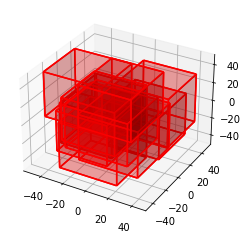

In [41]:
# https://codereview.stackexchange.com/q/155585

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.set_aspect("equal")

def x_y_edge(x_range, y_range, z_range, color):
    xx, yy = np.meshgrid(x_range, y_range)

    for value in [0, 1]:
        zz = np.zeros_like(xx)
        zz[:,:] = z_range[value]
        
        ax.plot_wireframe(xx, yy, zz, color=color)
        ax.plot_surface(xx, yy, zz, color=color, alpha=0.2)

def y_z_edge(x_range, y_range, z_range, color):
    yy, zz = np.meshgrid(y_range, z_range)

    for value in [0, 1]:
        xx = np.zeros_like(yy)
        xx[:,:] = x_range[value]

        ax.plot_wireframe(xx, yy, zz, color=color)
        ax.plot_surface(xx, yy, zz, color=color, alpha=0.2)

def x_z_edge(x_range, y_range, z_range, color):
    xx, zz = np.meshgrid(x_range, z_range)

    for value in [0, 1]:
        yy = np.zeros_like(zz)
        yy[:,:] = y_range[value]

        ax.plot_wireframe(xx, yy, zz, color=color)
        ax.plot_surface(xx, yy, zz, color=color, alpha=0.2)

def rect_prism(x_range, y_range, z_range, color="r"):
    x_y_edge(x_range, y_range, z_range, color)
    y_z_edge(x_range, y_range, z_range, color)
    x_z_edge(x_range, y_range, z_range, color)


def run():
#     rect_prism(np.array([-1, 1]),
#                np.array([-1, 1]),
#                np.array([-1, 1]))

    for ran in ranges[0:10]:
        rect_prism(*np.array(ran))
#     rect_prism(*np.array(range_intersection(ranges[0], ranges[1])), color="b")
    plt.show()

run()

In [107]:
# any volumes that don't intersect any? (disjoint?)

[ii for ii in range(len(ranges)) if all([not ii in ints for ints in double_intersections])]

[]

In [97]:
# any volumes that don't intersect any? (disjoint?)

[ii for ii in range(len(ranges)) if all([not ii in ints for ints in triple_intersections])]

[111, 116, 155, 274, 304, 364, 380, 407]

In [90]:
# can you find the same triple intersections by considering only the double intersections? -- YES!

# TODO: this doesn't take into account the on/off command

triple_intersections = set()

for (ii, jj) in double_intersections:
    for kk, r3_3d in enumerate(ranges):
    
        r1_3d = ranges[ii]
        r2_3d = ranges[jj]
    
#         if r1_3d == r2_3d or r2_3d == r3_3d or r3_3d == r1_3d:
#             continue
        if frozenset([ii, jj, kk]) in triple_intersections or kk in (ii, jj):
            continue

        ### TODO: is this intersection logic wrong? I think so!
        
        
        if intersection_size(range_intersection(r3_3d, range_intersection(r1_3d, r2_3d))):    
#                 triple_intersections.append(set([r1_3d, r2_3d, r3_3d]))
#             triple_intersections.append(set([ii, jj, kk]))
            triple_intersections.add(frozenset([ii, jj, kk]))

len(triple_intersections)#, len(set([frozenset(trip) for trip in triple_intersections]))

3317

In [81]:
list(combinations([1, 2, 3], r=2))

[(1, 2), (1, 3), (2, 3)]

In [85]:
# my brain is broken. all 3-way intersections have all 3 expected 2-way intersections, but there's more 3's somehow???

for ii, jj, kk in triple_intersections:
    print(ii, jj, kk)
    for a, b in combinations([ii, jj, kk], r=2):
        two_way = frozenset([a, b])
        print(two_way)
        assert two_way in double_intersections

248 393 299
frozenset({248, 393})
frozenset({248, 299})
frozenset({393, 299})
153 333 342
frozenset({153, 333})
frozenset({153, 342})
frozenset({333, 342})
256 131 143
frozenset({256, 131})
frozenset({256, 143})
frozenset({131, 143})
0 2 4
frozenset({0, 2})
frozenset({0, 4})
frozenset({2, 4})
19 13 15
frozenset({19, 13})
frozenset({19, 15})
frozenset({13, 15})
0 1 19
frozenset({0, 1})
frozenset({0, 19})
frozenset({1, 19})
160 354 151
frozenset({160, 354})
frozenset({160, 151})
frozenset({354, 151})
17 2 4
frozenset({17, 2})
frozenset({17, 4})
frozenset({2, 4})
401 171 303
frozenset({401, 171})
frozenset({401, 303})
frozenset({171, 303})
344 252 126
frozenset({344, 252})
frozenset({344, 126})
frozenset({252, 126})
32 180 316
frozenset({32, 180})
frozenset({32, 316})
frozenset({180, 316})
105 308 286
frozenset({105, 308})
frozenset({105, 286})
frozenset({308, 286})
329 130 370
frozenset({329, 130})
frozenset({329, 370})
frozenset({130, 370})
328 306 212
frozenset({328, 306})
frozenset({3

frozenset({33, 302})
frozenset({261, 302})
291 267 215
frozenset({267, 291})
frozenset({291, 215})
frozenset({267, 215})
333 351 167
frozenset({333, 351})
frozenset({333, 167})
frozenset({167, 351})
42 100 95
frozenset({42, 100})
frozenset({42, 95})
frozenset({100, 95})
138 85 406
frozenset({138, 85})
frozenset({138, 406})
frozenset({85, 406})
160 354 61
frozenset({160, 354})
frozenset({160, 61})
frozenset({354, 61})
156 358 207
frozenset({156, 358})
frozenset({156, 207})
frozenset({358, 207})
264 297 29
frozenset({264, 297})
frozenset({264, 29})
frozenset({297, 29})
385 294 415
frozenset({385, 294})
frozenset({385, 415})
frozenset({294, 415})
17 19 9
frozenset({17, 19})
frozenset({17, 9})
frozenset({9, 19})
406 358 207
frozenset({358, 406})
frozenset({406, 207})
frozenset({358, 207})
264 29 230
frozenset({264, 29})
frozenset({264, 230})
frozenset({29, 230})
48 147 127
frozenset({48, 147})
frozenset({48, 127})
frozenset({147, 127})
244 358 375
frozenset({244, 358})
frozenset({244, 375}

frozenset({1, 19})
frozenset({1, 7})
frozenset({19, 7})
204 180 316
frozenset({180, 204})
frozenset({204, 316})
frozenset({180, 316})
138 333 375
frozenset({138, 333})
frozenset({138, 375})
frozenset({333, 375})
360 273 395
frozenset({360, 273})
frozenset({360, 395})
frozenset({273, 395})
248 252 238
frozenset({248, 252})
frozenset({248, 238})
frozenset({252, 238})
216 218 255
frozenset({216, 218})
frozenset({216, 255})
frozenset({218, 255})
225 375 215
frozenset({225, 375})
frozenset({225, 215})
frozenset({215, 375})
104 43 268
frozenset({104, 43})
frozenset({104, 268})
frozenset({43, 268})
24 363 76
frozenset({24, 363})
frozenset({24, 76})
frozenset({363, 76})
140 20 86
frozenset({140, 20})
frozenset({140, 86})
frozenset({20, 86})
153 53 375
frozenset({153, 53})
frozenset({153, 375})
frozenset({53, 375})
128 372 198
frozenset({128, 372})
frozenset({128, 198})
frozenset({372, 198})
376 315 411
frozenset({376, 315})
frozenset({376, 411})
frozenset({315, 411})
187 68 332
frozenset({187,

414 278 30
frozenset({414, 278})
frozenset({414, 30})
frozenset({278, 30})
57 354 283
frozenset({57, 354})
frozenset({57, 283})
frozenset({354, 283})
331 147 127
frozenset({331, 147})
frozenset({331, 127})
frozenset({147, 127})
40 129 397
frozenset({40, 129})
frozenset({40, 397})
frozenset({129, 397})
244 53 375
frozenset({244, 53})
frozenset({244, 375})
frozenset({53, 375})
361 275 101
frozenset({361, 275})
frozenset({361, 101})
frozenset({275, 101})
280 105 308
frozenset({280, 105})
frozenset({280, 308})
frozenset({105, 308})
3 4 12
frozenset({3, 4})
frozenset({3, 12})
frozenset({4, 12})
329 370 244
frozenset({329, 370})
frozenset({329, 244})
frozenset({370, 244})
177 389 319
frozenset({177, 389})
frozenset({177, 319})
frozenset({389, 319})
11 2 3
frozenset({2, 11})
frozenset({3, 11})
frozenset({2, 3})
346 412 190
frozenset({346, 412})
frozenset({346, 190})
frozenset({412, 190})
390 326 87
frozenset({326, 390})
frozenset({390, 87})
frozenset({326, 87})
354 283 61
frozenset({354, 283}

frozenset({232, 415})
frozenset({332, 415})
40 129 381
frozenset({40, 129})
frozenset({40, 381})
frozenset({129, 381})
332 158 415
frozenset({332, 158})
frozenset({332, 415})
frozenset({158, 415})
353 114 398
frozenset({353, 114})
frozenset({353, 398})
frozenset({114, 398})
376 315 245
frozenset({376, 315})
frozenset({376, 245})
frozenset({315, 245})
275 158 23
frozenset({275, 158})
frozenset({275, 23})
frozenset({158, 23})
381 195 133
frozenset({195, 381})
frozenset({381, 133})
frozenset({195, 133})
90 235 374
frozenset({90, 235})
frozenset({90, 374})
frozenset({235, 374})
250 411 158
frozenset({250, 411})
frozenset({250, 158})
frozenset({411, 158})
333 342 215
frozenset({333, 342})
frozenset({333, 215})
frozenset({342, 215})
394 100 247
frozenset({394, 100})
frozenset({394, 247})
frozenset({100, 247})
24 177 319
frozenset({24, 177})
frozenset({24, 319})
frozenset({177, 319})
353 98 69
frozenset({353, 98})
frozenset({353, 69})
frozenset({98, 69})
411 412 158
frozenset({411, 412})
froz

2 19 4
frozenset({2, 19})
frozenset({2, 4})
frozenset({19, 4})
188 373 223
frozenset({188, 373})
frozenset({188, 223})
frozenset({373, 223})
315 187 294
frozenset({315, 187})
frozenset({315, 294})
frozenset({187, 294})
128 372 150
frozenset({128, 372})
frozenset({128, 150})
frozenset({372, 150})
244 333 215
frozenset({244, 333})
frozenset({244, 215})
frozenset({333, 215})
19 3 5
frozenset({3, 19})
frozenset({19, 5})
frozenset({3, 5})
115 187 294
frozenset({115, 187})
frozenset({115, 294})
frozenset({187, 294})
138 342 167
frozenset({138, 342})
frozenset({138, 167})
frozenset({342, 167})
165 286 279
frozenset({165, 286})
frozenset({165, 279})
frozenset({286, 279})
132 373 374
frozenset({132, 373})
frozenset({132, 374})
frozenset({373, 374})
210 372 150
frozenset({210, 372})
frozenset({210, 150})
frozenset({372, 150})
384 121 342
frozenset({384, 121})
frozenset({384, 342})
frozenset({121, 342})
285 230 47
frozenset({285, 230})
frozenset({285, 47})
frozenset({230, 47})
370 244 358
frozens

frozenset({97, 228})
369 386 387
frozenset({369, 386})
frozenset({369, 387})
frozenset({386, 387})
404 90 220
frozenset({90, 404})
frozenset({220, 404})
frozenset({90, 220})
138 406 167
frozenset({138, 406})
frozenset({138, 167})
frozenset({406, 167})
289 371 70
frozenset({289, 371})
frozenset({289, 70})
frozenset({371, 70})
272 105 78
frozenset({272, 105})
frozenset({272, 78})
frozenset({105, 78})
0 5 7
frozenset({0, 5})
frozenset({0, 7})
frozenset({5, 7})
357 99 197
frozenset({99, 357})
frozenset({197, 357})
frozenset({99, 197})
4 5 14
frozenset({4, 5})
frozenset({4, 14})
frozenset({5, 14})
337 65 58
frozenset({65, 337})
frozenset({337, 58})
frozenset({65, 58})
400 105 165
frozenset({400, 105})
frozenset({400, 165})
frozenset({105, 165})
217 43 100
frozenset({217, 43})
frozenset({217, 100})
frozenset({43, 100})
381 133 397
frozenset({381, 133})
frozenset({381, 397})
frozenset({133, 397})
376 411 294
frozenset({376, 411})
frozenset({376, 294})
frozenset({411, 294})
138 156 167
frozens

256 131 134
frozenset({256, 131})
frozenset({256, 134})
frozenset({131, 134})
0 3 15
frozenset({0, 3})
frozenset({0, 15})
frozenset({3, 15})
113 322 221
frozenset({113, 322})
frozenset({113, 221})
frozenset({322, 221})
8 1 10
frozenset({8, 1})
frozenset({8, 10})
frozenset({1, 10})
385 409 315
frozenset({385, 409})
frozenset({385, 315})
frozenset({409, 315})
17 4 15
frozenset({17, 4})
frozenset({17, 15})
frozenset({4, 15})
154 298 287
frozenset({154, 298})
frozenset({154, 287})
frozenset({298, 287})
313 330 199
frozenset({313, 330})
frozenset({313, 199})
frozenset({330, 199})
408 289 365
frozenset({408, 289})
frozenset({408, 365})
frozenset({289, 365})
361 101 158
frozenset({361, 101})
frozenset({361, 158})
frozenset({101, 158})
9 3 7
frozenset({9, 3})
frozenset({9, 7})
frozenset({3, 7})
105 165 78
frozenset({105, 165})
frozenset({105, 78})
frozenset({165, 78})
131 134 143
frozenset({131, 134})
frozenset({131, 143})
frozenset({134, 143})
228 221 22
frozenset({228, 221})
frozenset({228, 

326 386 102
frozenset({386, 326})
frozenset({102, 326})
frozenset({386, 102})
376 412 332
frozenset({376, 412})
frozenset({376, 332})
frozenset({412, 332})
385 50 47
frozenset({385, 50})
frozenset({385, 47})
frozenset({50, 47})
402 171 311
frozenset({402, 171})
frozenset({402, 311})
frozenset({171, 311})
16 9 6
frozenset({16, 9})
frozenset({16, 6})
frozenset({9, 6})
59 77 149
frozenset({59, 77})
frozenset({59, 149})
frozenset({77, 149})
203 124 45
frozenset({203, 124})
frozenset({203, 45})
frozenset({124, 45})
32 180 350
frozenset({32, 180})
frozenset({32, 350})
frozenset({180, 350})
8 18 4
frozenset({8, 18})
frozenset({8, 4})
frozenset({18, 4})
338 311 303
frozenset({338, 311})
frozenset({338, 303})
frozenset({303, 311})
322 302 22
frozenset({322, 302})
frozenset({322, 22})
frozenset({302, 22})
235 36 373
frozenset({235, 36})
frozenset({235, 373})
frozenset({36, 373})
312 158 415
frozenset({312, 158})
frozenset({312, 415})
frozenset({158, 415})
1 4 6
frozenset({1, 4})
frozenset({1, 6}

frozenset({315, 187})
376 232 411
frozenset({376, 232})
frozenset({376, 411})
frozenset({232, 411})
401 21 239
frozenset({401, 21})
frozenset({401, 239})
frozenset({21, 239})
0 13 15
frozenset({0, 13})
frozenset({0, 15})
frozenset({13, 15})
17 14 6
frozenset({17, 14})
frozenset({17, 6})
frozenset({14, 6})
1 12 17
frozenset({1, 12})
frozenset({1, 17})
frozenset({17, 12})
161 33 107
frozenset({161, 33})
frozenset({161, 107})
frozenset({33, 107})
411 158 23
frozenset({411, 158})
frozenset({411, 23})
frozenset({158, 23})
162 35 276
frozenset({162, 35})
frozenset({162, 276})
frozenset({35, 276})
80 366 231
frozenset({80, 366})
frozenset({80, 231})
frozenset({366, 231})
90 235 404
frozenset({90, 235})
frozenset({90, 404})
frozenset({235, 404})
258 381 133
frozenset({258, 381})
frozenset({258, 133})
frozenset({381, 133})
141 222 263
frozenset({141, 222})
frozenset({141, 263})
frozenset({222, 263})
11 5 6
frozenset({11, 5})
frozenset({11, 6})
frozenset({5, 6})
297 186 123
frozenset({297, 186})

2 3 13
frozenset({2, 3})
frozenset({2, 13})
frozenset({3, 13})
244 406 375
frozenset({244, 406})
frozenset({244, 375})
frozenset({406, 375})
402 303 239
frozenset({402, 303})
frozenset({402, 239})
frozenset({239, 303})
406 156 358
frozenset({156, 406})
frozenset({358, 406})
frozenset({156, 358})
409 187 284
frozenset({409, 187})
frozenset({409, 284})
frozenset({187, 284})
108 157 174
frozenset({108, 157})
frozenset({108, 174})
frozenset({157, 174})
375 406 215
frozenset({406, 375})
frozenset({215, 375})
frozenset({406, 215})
187 245 190
frozenset({187, 245})
frozenset({187, 190})
frozenset({245, 190})
361 250 68
frozenset({361, 250})
frozenset({361, 68})
frozenset({250, 68})
369 326 263
frozenset({369, 326})
frozenset({369, 263})
frozenset({326, 263})
360 398 184
frozenset({360, 398})
frozenset({360, 184})
frozenset({184, 398})
153 333 406
frozenset({153, 333})
frozenset({153, 406})
frozenset({333, 406})
187 164 284
frozenset({187, 164})
frozenset({187, 284})
frozenset({164, 284})
156 

frozenset({281, 109})
frozenset({290, 109})
322 228 22
frozenset({322, 228})
frozenset({322, 22})
frozenset({228, 22})
411 412 187
frozenset({411, 412})
frozenset({411, 187})
frozenset({187, 412})
409 411 332
frozenset({409, 411})
frozenset({409, 332})
frozenset({411, 332})
9 6 14
frozenset({9, 6})
frozenset({9, 14})
frozenset({6, 14})
9 4 5
frozenset({9, 4})
frozenset({9, 5})
frozenset({4, 5})
210 20 150
frozenset({210, 20})
frozenset({210, 150})
frozenset({20, 150})
315 164 245
frozenset({315, 164})
frozenset({315, 245})
frozenset({164, 245})
138 333 358
frozenset({138, 333})
frozenset({138, 358})
frozenset({333, 358})
104 43 100
frozenset({104, 43})
frozenset({104, 100})
frozenset({43, 100})
8 15 7
frozenset({8, 15})
frozenset({8, 7})
frozenset({7, 15})
0 1 18
frozenset({0, 1})
frozenset({0, 18})
frozenset({1, 18})
113 261 33
frozenset({113, 261})
frozenset({113, 33})
frozenset({33, 261})
187 411 190
frozenset({187, 411})
frozenset({187, 190})
frozenset({411, 190})
385 50 284
frozen

In [92]:
# quad? FIRST FIGURE OUT COUNTS OF 2, 3 way intersections.

# TODO: this doesn't take into account the on/off command

quad_intersections = set()

for (ii, jj, kk) in triple_intersections:
    for ll, r4_3d in enumerate(ranges):
    
        r1_3d = ranges[ii]
        r2_3d = ranges[jj]
        r3_3d = ranges[kk]
    
        if frozenset([ii, jj, kk, ll]) in quad_intersections or ll in (ii, jj, kk):
            continue
        
        if intersection_size(range_intersection(r4_3d, range_intersection(r3_3d, range_intersection(r1_3d, r2_3d)))):
            quad_intersections.add(frozenset([ii, jj, kk, ll]))

len(quad_intersections)#, len(set([frozenset(trip) for trip in triple_intersections]))

4343

# possible algorithm
* given only a function that gives the intersection of two regions
* init empty lists of regions_on and regions_off
* for each 'on' region in instructions:
    * check for intersection with all regions_on
    * append region to regions_on
    * append each intersection (if any) to regions_off
        * (this does count out triple intersections, which need to be added again to compensate)